In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

from rw import scan_handler

rc('text', usetex=False)
rc('font', family='serif', size=20)
rc('figure', figsize=(12,8))
rc('axes',linewidth=2)

%load_ext autoreload
%autoreload 2

# Reader

In [2]:
#file_path = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_2.scan"    # series config, read S11 and S21
#file_path = "/home/cmsdaq/Analysis/Data/RUN_6/processed_data/BAW_6_1.scan"    # parallel config, read B
file_path = "/home/cmsdaq/Analysis/Data/RUN_5/processed_data/BAW_5_8.scan"    # VNA 3 porte, 0-20 MHz
reader = scan_handler.ScanReader(file_path)        # create the object

In [3]:
# get the name list of all the resonances parameters 
print(reader.get_parameters_tags())

['C_baw', 'L_baw', 'Q', 'R_baw', 'R_par', 'asim', 'bw', 'depth', 'er_Q', 'er_asim', 'er_f0', 'er_gamma', 'er_norm', 'f0', 'fcenter', 'fmax', 'fmin', 'gamma', 'input_power', 'norm', 'npt', 'offset_at_peak', 'span', 'sweep', 'x']


In [4]:
# get the parameter Q for all the resonances as an array
R = reader.get_parameters('f0')
print(np.sort(R))

[ 1.28840286  1.4589987   1.52683523  1.6482061   1.86793435  1.91108699
  1.98034131  2.00252424  2.07586311  2.68771885  2.7808133   2.82086836
  3.00922379  3.06867646  3.09811235  3.10977186  3.13209922  3.15243155
  3.21772366  3.28285789  3.42422401  3.45901161  3.89376554  4.12840086
  4.59268131  4.60946338  4.8178647   4.99990489  5.0000318   5.08689922
  5.09009764  5.09399574  5.17414303  5.18151942  5.18959811  5.20035004
  5.24099047  5.35907009  5.36666943  5.47715134  5.50497977  5.54797485
  5.57398864  5.6219672   5.64502495  5.64620183  5.67238414  5.72393825
  5.76056663  5.96280251  6.04818861  6.45737049  6.73751285  6.91702582
  7.01244836  7.61545002  8.29690151  8.30893729  8.40263462  8.40937352
  8.49223923  8.4957002   8.49917316  8.50804628  8.57862547  8.58201255
  8.58544928  8.59282688  8.59440135  8.60509351  8.66260984  8.66913254
  8.67806226  8.68877015  8.70032256  8.74480755  8.75117128  8.78204778
  8.80851378  9.10540126  9.17845189  9.19947386  9

In [5]:
# get (as a python dictionary) all the resonance parameter. 
# you can get a resonance from its raw name
#           reader.get_resonance(name="resonance_10")
# you can get a resonance from its position inside the .scan
# e.g.: get the seventh resonance
#           reader.get_resonance(loc=7)
# you can get the resonance from its frequency (the middle frequency). 
# it gets the closest resonance to the selected frequency

resonance = reader.get_resonance(freq=5.8e6)

In [6]:
for key in resonance.keys():
    print(key)
print("The resonance called ",resonance['reso_name'] ," has a Q = ", resonance['Q'])

C_baw
L_baw
Q
R_baw
R_par
asim
bw
depth
er_Q
er_asim
er_f0
er_gamma
er_norm
f0
fcenter
fmax
fmin
gamma
input_power
norm
npt
offset_at_peak
span
sweep
x
freq
phase
power
reso_name
The resonance called  resonance_1339  has a Q =  12739.447084412552


## Useful(?) examples

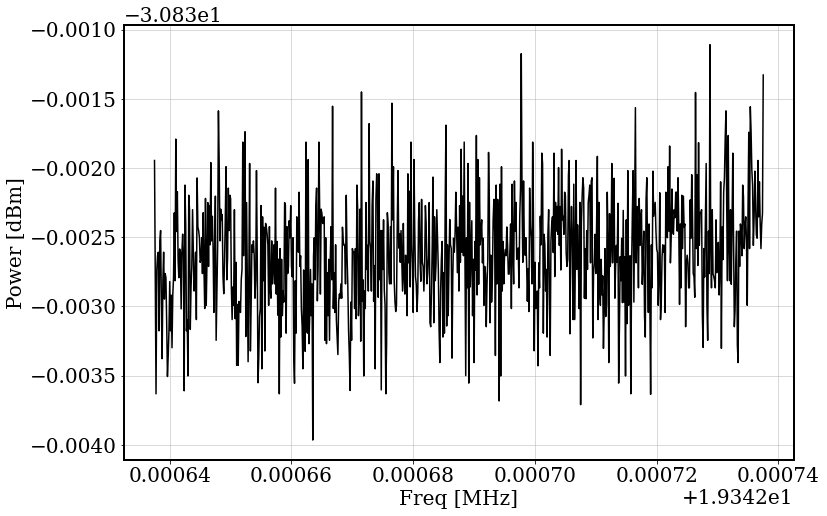

In [7]:
# plot the resonance at 5.66 MHz
reso = reader.get_resonance(freq=5.66e6)

plt.plot(reso['freq']*1e-6,reso['power'],c='k')
plt.xlabel('Freq [MHz]')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

In [8]:
print(reso['R_baw'])
print(reso['R_par'])
print(reso['x'])

print(reso['depth'])


print(reso['C_baw'])
print(reso['L_baw'])

print(reso['f0'])

67658795.3513445
49.99996304991628
0.24999981524954726
3.209445272327883e-06
9.546156373934836e-21
7092.1550990451005
19.342684462249427


conversion is: dBm-W
Parametro  1 :  -5.336716631955314e-14  +/-  2.544756450326232e-14
Parametro  2 :  1.257559705609406e-07  +/-  1.5135519271141742e-07
Parametro  3 :  19.342731178506263  +/-  1.5094554120612535e-07
Parametro  4 :  0.0005447031411744013  +/-  9.727114162057936e-05
Parametro  5 :  -0.009710483988729366  +/-  0.0018814852251833696
Parametro  6 :  0.3111668172554768  +/-  3.757394072706803e-07
Q = 7.69e+07  +/-  0.6001525833438581


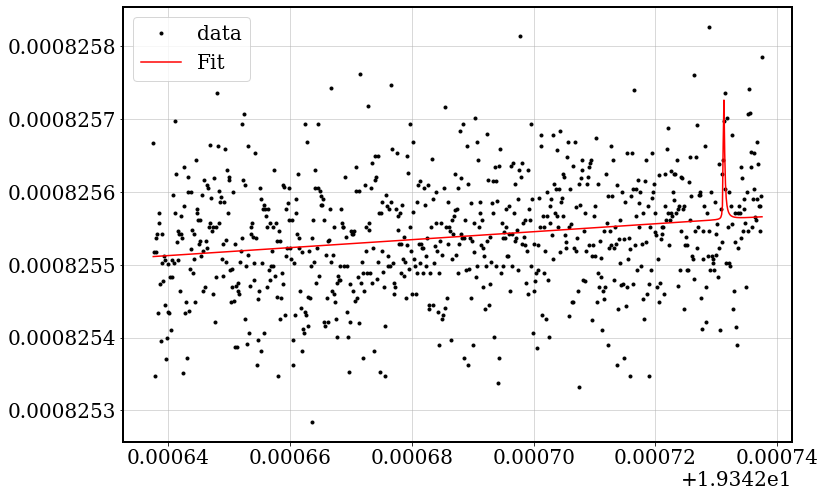

In [9]:
from process import utils
utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True)


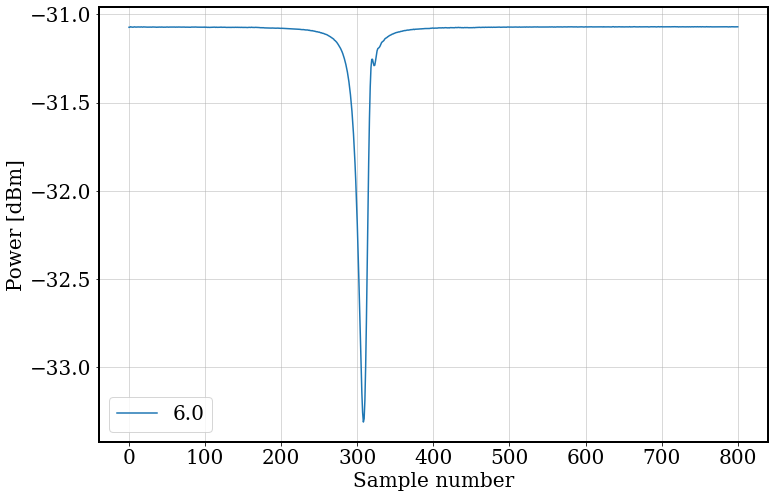

In [10]:
from process import utils

# plot all the resonance with a Q greater than 1e7
Q = reader.get_parameters('Q')
loc = np.where(Q>3e6)[0]

for l in loc:
    power = reader.get_resonance(loc=l)['power']
    freq = reader.get_resonance(loc=l)['freq']
    f0 = reader.get_resonance(loc=l)['f0']
    
    #utils.fit_resonance(freq*1e-6, power,verbose=True)
    
    plt.plot(power,label=str(np.round(f0)))
    
plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

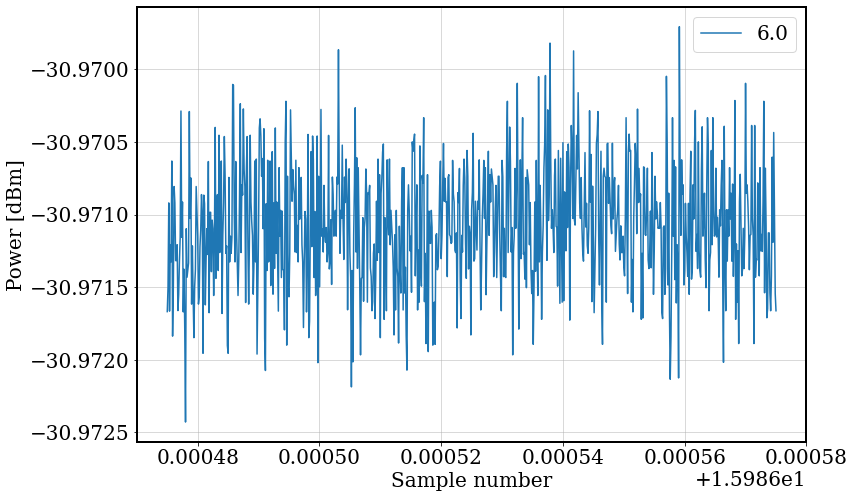

conversion is: dBm-W
Parametro  1 :  1.1751018709115331e-13  +/-  1.1658510789557555e-13
Parametro  2 :  1.2454333547532313e-06  +/-  1.62738995540297e-06
Parametro  3 :  15.986556579474797  +/-  9.893092119851087e-07
Parametro  4 :  0.00020105083835468698  +/-  0.00010530860661728202
Parametro  5 :  -0.002414466440253184  +/-  0.001683518137935764
Parametro  6 :  0.5123168746468916  +/-  1.405035835664662e-07
Q = 6.42e+06  +/-  0.39717468952047513


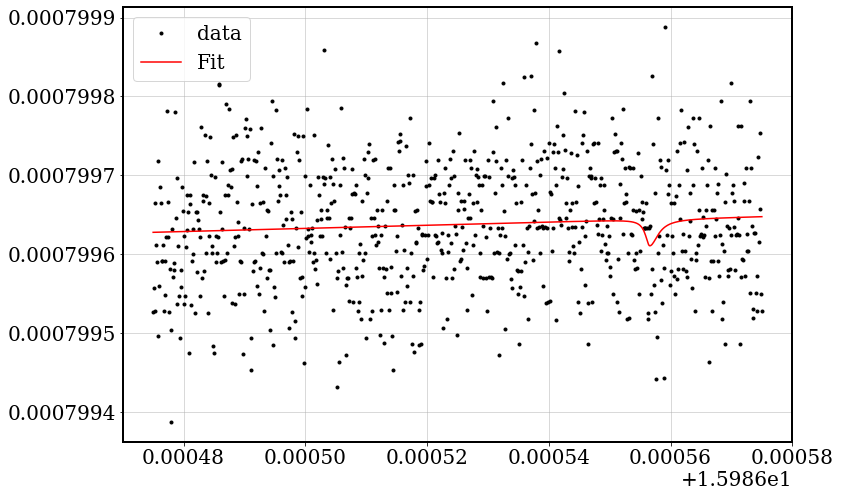

In [11]:
reso = reader.get_resonance(loc=38)

plt.plot(reso['freq']*1e-6, reso['power'],label=str(np.round(f0)))

plt.legend()
plt.xlabel('Sample number')
plt.ylabel('Power [dBm]')
plt.grid(alpha=0.6)
plt.show()

utils.fit_resonance(reso['freq']*1e-6, reso['power'],verbose=True)



In [12]:
#Q = np.sort(reader.get_parameters('Q'))[-1]
#print(Q)
Q = reader.get_parameters('Q')
f = reader.get_parameters('f0')
d = reader.get_parameters('depth')

loc = np.intersect1d(np.where(Q>2e6)[0], np.where(d > 0.05)[0])

#loc = np.where(f>17)[0]

for l in loc:
    print(l)

    power = reader.get_resonance(loc=l)['power']
    freq = reader.get_resonance(loc=l)['freq']

    utils.fit_resonance(freq*1e-6, power, verbose=True)



conversion is: dBm-W
Parametro  1 :  2.235919526126678e-12  +/-  4.724033795920389e-12
Parametro  2 :  9.995522193726879e-06  +/-  2.0964553667277313e-05
Parametro  3 :  13.559629088445243  +/-  2.121336939612519e-06
Parametro  4 :  0.0008133786947318915  +/-  0.01618096920666254
Parametro  5 :  -0.01023695872747142  +/-  0.21940839504865065
Parametro  6 :  61.44402400409796  +/-  4.838640867064128e-06
Q = 6.78e+05  +/-  0.1061143629394444


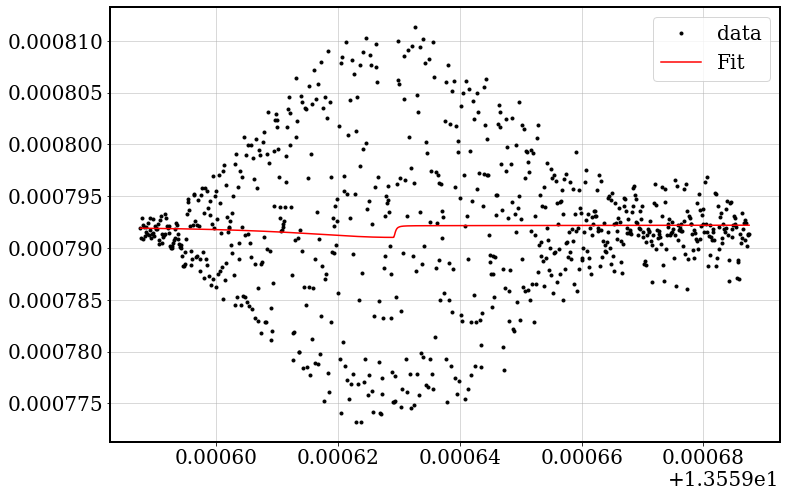

In [13]:
index = 4
power = reader.get_resonance(loc=index)['power']
freq = reader.get_resonance(loc=index)['freq']
utils.fit_resonance(freq*1e-6, power, verbose=True)

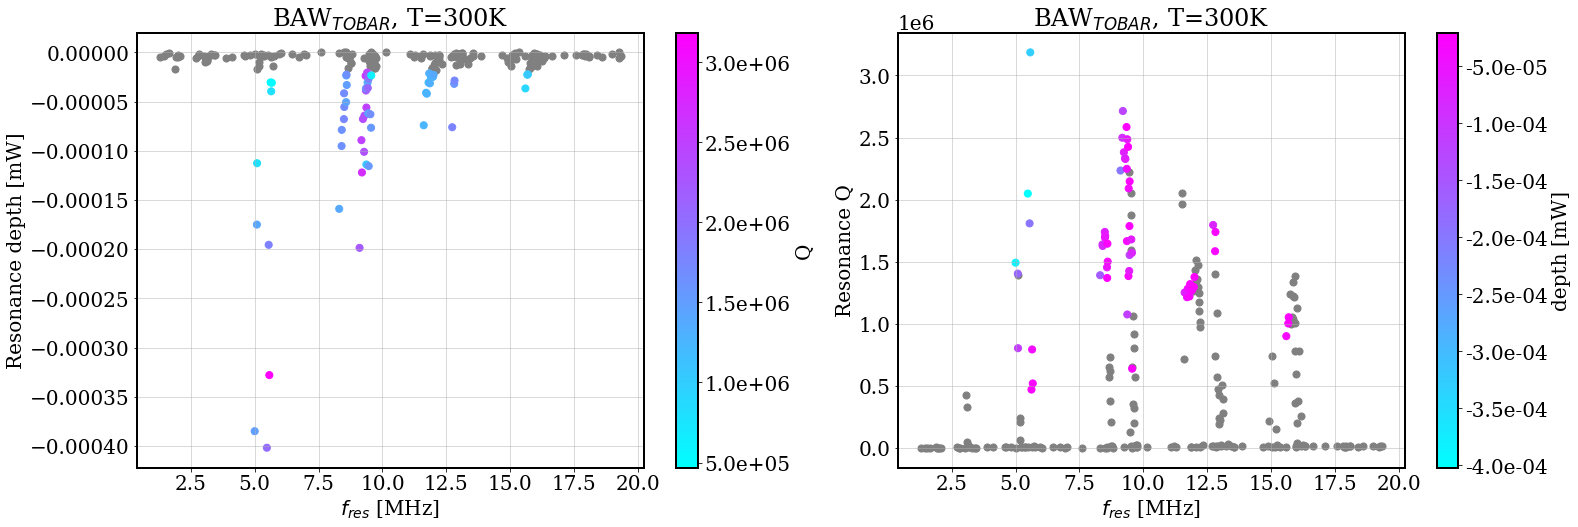

In [14]:
from matplotlib  import cm
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')


depth_thr = 0.00002 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where((Q != -2) & (Q < 4e6) )[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(25)

d = ax1.scatter(peak_pos[ii2],-depth[ii2],s=50,          marker = 'o', color='grey')
d = ax1.scatter(peak_pos[ii], -depth[ii], s=50, c=Q[ii], marker = 'o', cmap = cm.cool )
ax1.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(d,label='Q',format='%.1e', ax=ax1)
ax1.set_xlabel(r'$f_{res}$ [MHz]')
ax1.set_ylabel('Resonance depth [mW]')

e = ax2.scatter(peak_pos[ii2],Q[ii2],s=50,marker='o',color='grey')
e = ax2.scatter(peak_pos[ii], Q[ii],s=50, c=-depth[ii], marker = 'o', cmap = cm.cool )
ax2.set_title(r'BAW$_{TOBAR}$, T=300K')
fig.colorbar(e,label='depth [mW]',format='%.1e', ax=ax2)
ax2.set_xlabel(r'$f_{res}$ [MHz]')
ax2.set_ylabel('Resonance Q')

ax1.grid(alpha=0.6)
ax2.grid(alpha=0.6)

#plt.savefig('Scan_22.png')
plt.show()

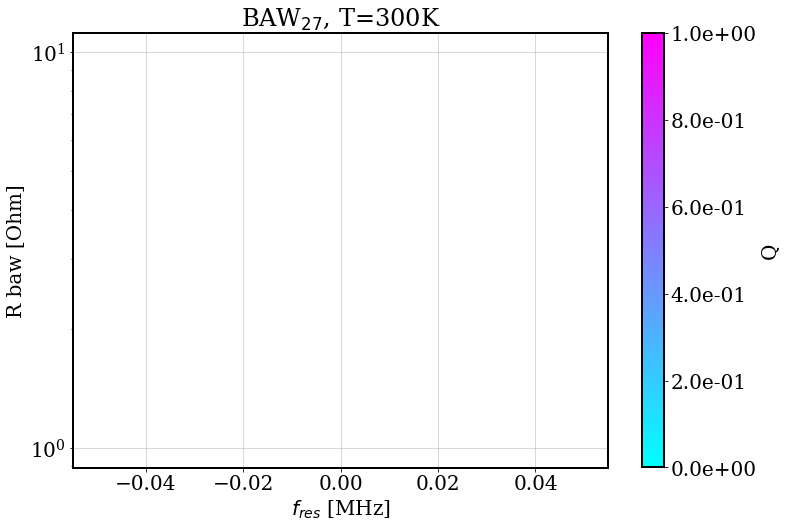

In [15]:
depth = reader.get_parameters('depth')
Q = reader.get_parameters('Q')
peak_pos = reader.get_parameters('f0')
R = reader.get_parameters('R_baw')
C = reader.get_parameters('C_baw')
L = reader.get_parameters('L_baw')

depth_thr = 0.02 #è l'altezza dei picchi sotto la quale non plotta il Q valore
ii = np.where(depth>depth_thr)[0]
ii2 = np.where(depth<=depth_thr)[0]
ii3 = np.where(Q > 1e6)[0]

ii = np.intersect1d(ii,ii3)
ii2 = np.intersect1d(ii2,ii3)

fig = plt.figure()
ax = fig.add_subplot(111)
#d =ax.scatter(peak_pos[ii2],R[ii2],s=50,marker='o',color='grey')
d =ax.scatter(peak_pos[ii],R[ii],s=50,c=Q[ii], marker = 'o', cmap = cm.cool )

plt.title(r'BAW$_{27}$, T=300K')
plt.colorbar(d,label='Q',format='%.1e')
plt.xlabel(r'$f_{res}$ [MHz]')
plt.ylabel('R baw [Ohm]')
plt.grid(alpha=0.6)
plt.yscale('log')
#plt.savefig('Scan_22.png')
plt.show()

